In [12]:
import pandas as pd
import numpy as np
import math
import random

    
random.seed(3)
no_of_hours=24

# transforming info from geographic data to list of adjacents
# adjacents - transforming info from geographic data to list of adjacents
ad=[None]*22
ad[0]=[2,22]
ad[1]=[1,3]
ad[2]=[2,4,8]
ad[3]=[3,5]
ad[4]=[4,6]
ad[5]=[5,7,9]
ad[6]=[6,8]
ad[7]=[3,7,12,21]
ad[8]=[6,10,11]
ad[9]=[9,13]
ad[10]=[9,12]
ad[11]=[8,11,13]
ad[12]=[10,12,14,18]
ad[13]=[13,15]
ad[14]=[14,16]
ad[15]=[15,17]
ad[16]=[16,19]
ad[17]=[13,19]
ad[18]=[17,18,20]
ad[19]=[19,22]
ad[20]=[8,22]
ad[21]=[1,20,21]

# Distance matrix
dis=[None]*22
dis[0]=[2,3]
dis[1]=[2,4]
dis[2]=[4,3,4]
dis[3]=[3,2]
dis[4]=[2,3]
dis[5]=[3,2,5]
dis[6]=[2,2]
dis[7]=[4,2,4,3]
dis[8]=[5,3,3]
dis[9]=[3,3]
dis[10]=[3,3]
dis[11]=[4,3,7]
dis[12]=[3,7,5,4]
dis[13]=[5,2]
dis[14]=[2,3]
dis[15]=[3,3]
dis[16]=[3,6]
dis[17]=[4,5]
dis[18]=[6,5,8]
dis[19]=[8,7]
dis[20]=[3,3]
dis[21]=[3,7,3]

dis=[[250*j for j in dis[i]] for i in range(22)]

# BP of each node
    # for now choosing randomly, later on BP is determined by several other factors
    # BP is list of list which contains Background polution data of all 22 nodes for all 24 hours

BP = [[(random.uniform(-10,10)) for j in range(22)] for i in range(no_of_hours)]

# Convective transfer
    # convective tansfer coefficient (K)
    # for now choosing K to be a constant, later on it might be varying for different nodal interactions
K=[[0.5 if j+1 in ad[i] else 0 for j in range(22)] for i in range(22)]

# pollution data for each node
pol=[[0 for i in range(22)] for j in range(no_of_hours)]
pol_i_to_j=[[[0 for i in range(22)] for j in range(22)] for k in range(no_of_hours)]
pol_j_to_i=[[[0 for i in range(22)] for j in range(22)] for k in range(no_of_hours)]

# starting case at t=0
pol[0]=[random.uniform(20,35) for i in range(22)]
pol_i_to_j[0]=[[0]*22]*22
pol_j_to_i[0]=[[0]*22]*22

# convective transfer
dis_inv=[[1/i for i in dis[j]] for j in range(22)]


# at any time t
for t in range(1,no_of_hours):
    
    # convective transfer
    # i to j
    for i in range(22):
        for j in ad[i]:
            pol_i_to_j[t][i][j-1]=K[i][j-1]*pol[t-1][i]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[i])
    
    # j to i
    for i in range(22):
        for j in ad[i]:
            pol_j_to_i[t][i][j-1]=K[i][j-1]*pol[t-1][j-1]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[j-1])
            
    # pollution concentration
    pol[t]=[(pol[t-1][i]+BP[t][i]-sum(pol_i_to_j[t][i])+sum(pol_j_to_i[t][i])) for i in range(22)]
    
pol_node=list(zip(*pol))
net_Pij=list(zip(*[[sum(pol_i_to_j[t][i]) for i in range(22)] for t in range(no_of_hours)]))
net_Pji=list(zip(*[[sum(pol_j_to_i[t][i]) for i in range(22)] for t in range(no_of_hours)]))
BP_node=list(zip(*BP))

In [13]:
net_inlet=[[]*no_of_hours]*22
for i in range(22):
    net_inlet[i]=[(net_Pji[i][j]-net_Pij[i][j]) for j in range(no_of_hours)]

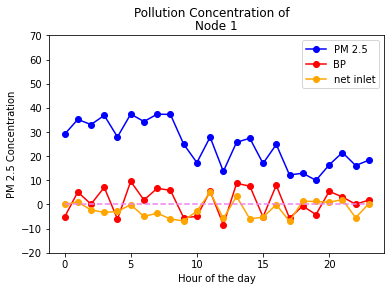

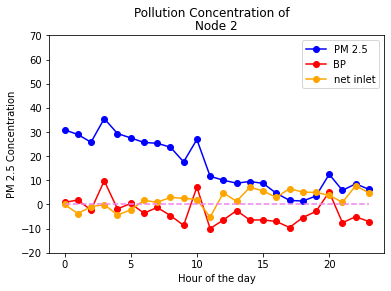

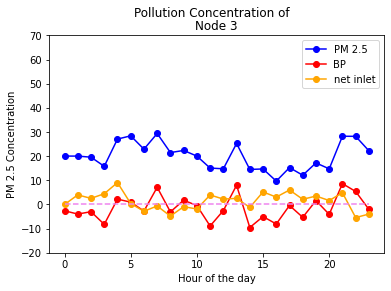

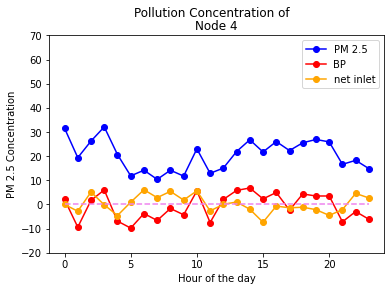

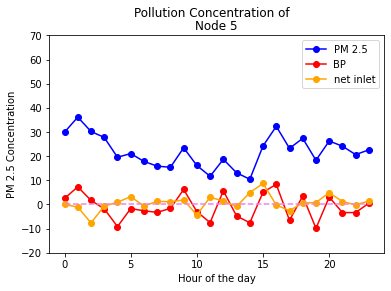

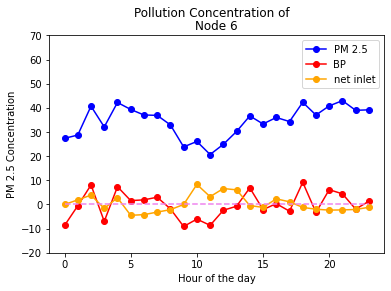

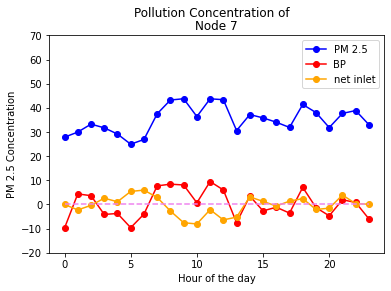

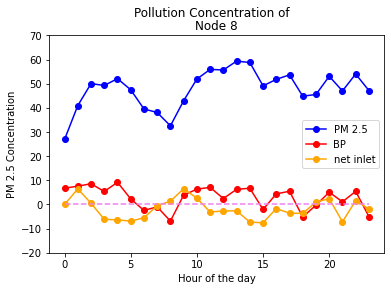

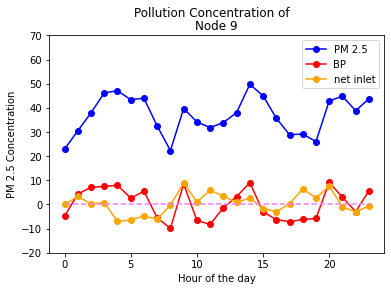

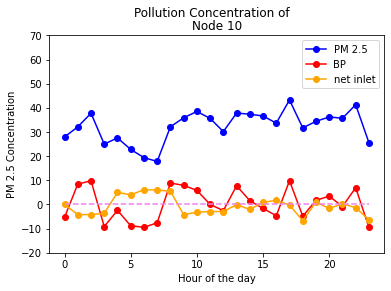

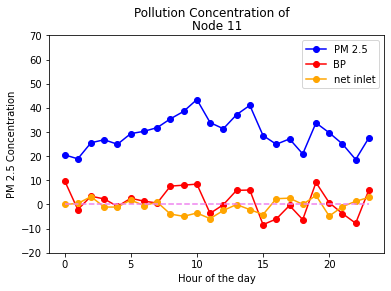

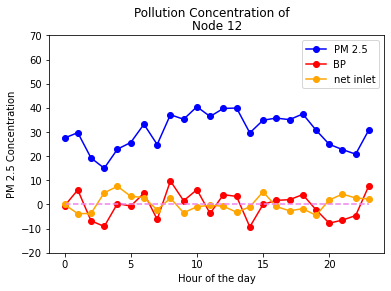

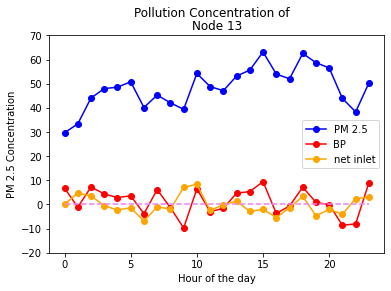

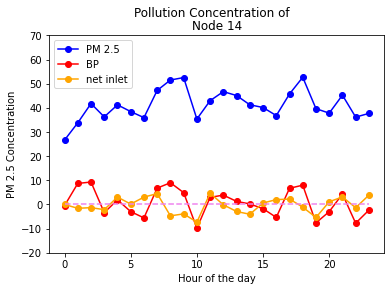

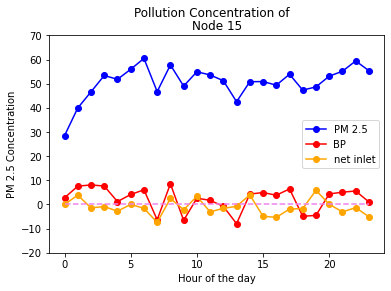

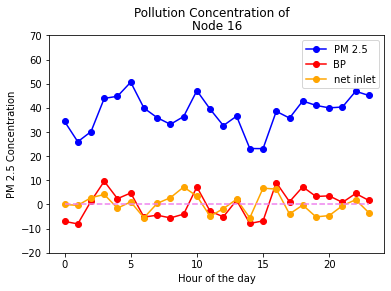

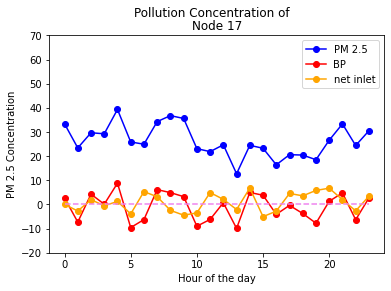

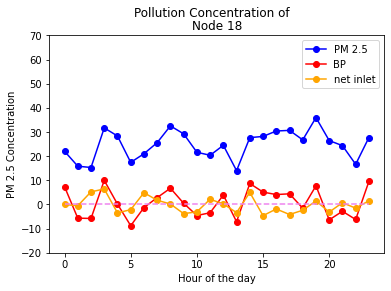

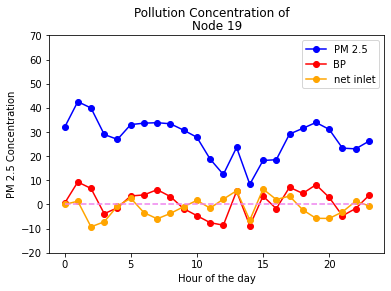

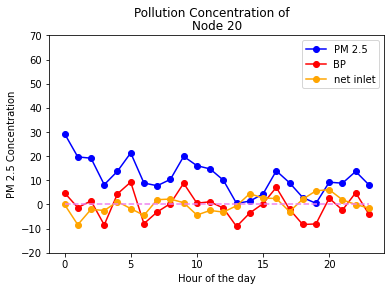

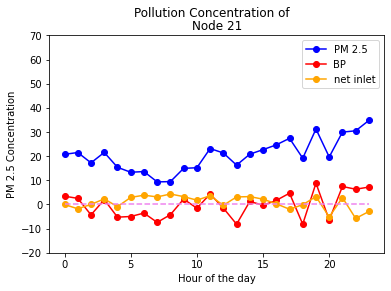

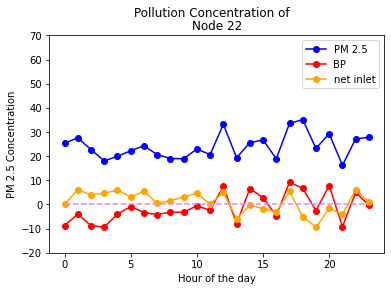

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(22):
    x=np.arange(0,no_of_hours,1)
    fig,ax = plt.subplots(figsize=(6,4))
    fig.suptitle('Pollution Concentration of')
    ax_1=ax
    ax_1.plot(x,np.array(pol_node[i]),'o-',color='blue',label='PM 2.5')
    ax_1.plot(x,list(zip(*BP))[i],'o-',color='red',label='BP')
    ax_1.plot(x,net_inlet[i],'o-',color='orange',label='net inlet')
    ax_1.plot([0,23],[0,0],ls='--',color='violet')
    ax_1.legend()
    ax_1.set_title(f'Node {i+1}')
    ax_1.set_yticks([-20,-10,0,10,20,30,40,50,60,70])
    ax_1.set_xlabel('Hour of the day')
    ax_1.set_ylabel('PM 2.5 Concentration')
    plt.show()

## EXPERIMENTS

In [23]:
import pandas as pd
import numpy as np
import math
import random

    
random.seed(4)
no_of_hours=24

# transforming info from geographic data to list of adjacents
# adjacents - transforming info from geographic data to list of adjacents
ad=[None]*22
ad[0]=[2,22]
ad[1]=[1,3]
ad[2]=[2,4,8]
ad[3]=[3,5]
ad[4]=[4,6]
ad[5]=[5,7,9]
ad[6]=[6,8]
ad[7]=[3,7,12,21]
ad[8]=[6,10,11]
ad[9]=[9,13]
ad[10]=[9,12]
ad[11]=[8,11,13]
ad[12]=[10,12,14,18]
ad[13]=[13,15]
ad[14]=[14,16]
ad[15]=[15,17]
ad[16]=[16,19]
ad[17]=[13,19]
ad[18]=[17,18,20]
ad[19]=[19,22]
ad[20]=[8,22]
ad[21]=[1,20,21]

# Distance matrix
dis=[None]*22
dis[0]=[2,3]
dis[1]=[2,4]
dis[2]=[4,3,4]
dis[3]=[3,2]
dis[4]=[2,3]
dis[5]=[3,2,5]
dis[6]=[2,2]
dis[7]=[4,2,4,3]
dis[8]=[5,3,3]
dis[9]=[3,3]
dis[10]=[3,3]
dis[11]=[4,3,7]
dis[12]=[3,7,5,4]
dis[13]=[5,2]
dis[14]=[2,3]
dis[15]=[3,3]
dis[16]=[3,6]
dis[17]=[4,5]
dis[18]=[6,5,8]
dis[19]=[8,7]
dis[20]=[3,3]
dis[21]=[3,7,3]

dis=[[250*j for j in dis[i]] for i in range(22)]

# BP of each node
    # for now choosing randomly, later on BP is determined by several other factors
    # BP is list of list which contains Background polution data of all 22 nodes for all 24 hours

BP = [[0 for j in range(22)] for i in range(no_of_hours)]

# Convective transfer
    # convective tansfer coefficient (K)
    # for now choosing K to be a constant, later on it might be varying for different nodal interactions
k=0.5
K=[[k if j+1 in ad[i] else 0 for j in range(22)] for i in range(22)]

# pollution data for each node
pol=[[0 for i in range(22)] for j in range(no_of_hours)]
pol_i_to_j=[[[0 for i in range(22)] for j in range(22)] for k in range(no_of_hours)]
pol_j_to_i=[[[0 for i in range(22)] for j in range(22)] for k in range(no_of_hours)]

# starting case at t=0
pol[0]=[random.randint(20,50) for i in range(22)]
pol_i_to_j[0]=[[0]*22]*22
pol_j_to_i[0]=[[0]*22]*22

# convective transfer
dis_inv=[[1/i for i in dis[j]] for j in range(22)]


# at any time t
for t in range(1,no_of_hours):
    
    # convective transfer
    # i to j
    for i in range(22):
        for j in ad[i]:
            pol_i_to_j[t][i][j-1]=K[i][j-1]*pol[t-1][i]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[i])
    
    # j to i
    for i in range(22):
        for j in ad[i]:
            pol_j_to_i[t][i][j-1]=K[i][j-1]*pol[t-1][j-1]*dis_inv[i][ad[i].index(j)]/sum(dis_inv[j-1])
            
    # pollution concentration
    pol[t]=[(pol[t-1][i]+BP[t][i]-sum(pol_i_to_j[t][i])+sum(pol_j_to_i[t][i])) for i in range(22)]
    
pol_node=list(zip(*pol))
net_Pij=list(zip(*[[sum(pol_i_to_j[t][i]) for i in range(22)] for t in range(no_of_hours)]))
net_Pji=list(zip(*[[sum(pol_j_to_i[t][i]) for i in range(22)] for t in range(no_of_hours)]))
BP_node=list(zip(*BP))
net_inlet=[[None]*no_of_hours]*22
for i in range(22):
     net_inlet[i]=[(net_Pji[i][j]-net_Pij[i][j]) for j in range(no_of_hours)]

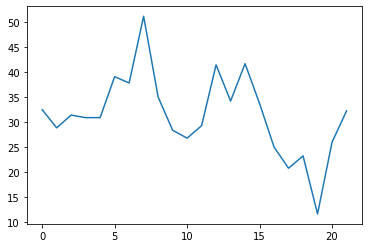

In [26]:
plt.plot(pol[23])

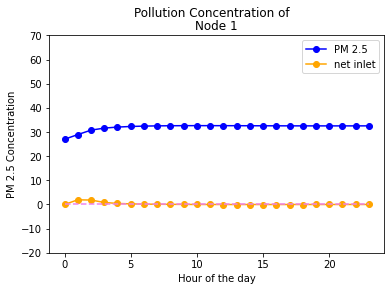

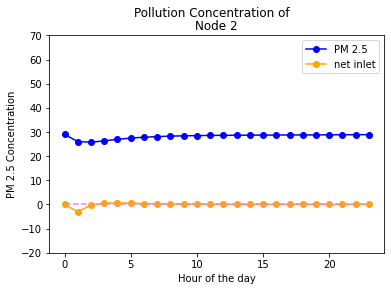

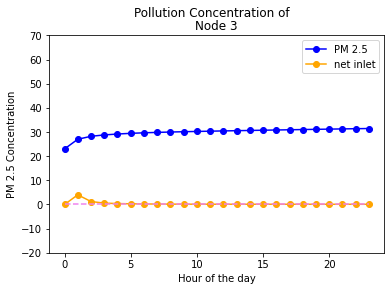

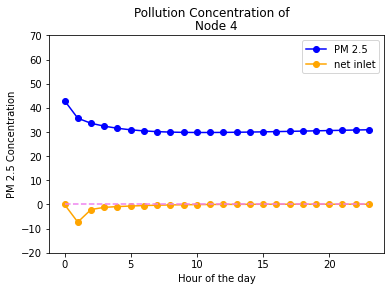

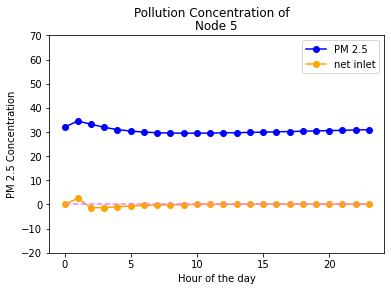

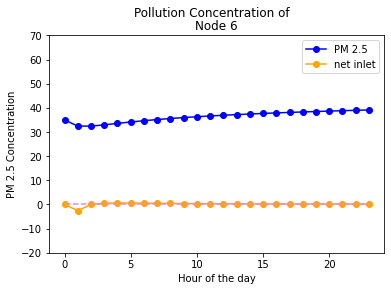

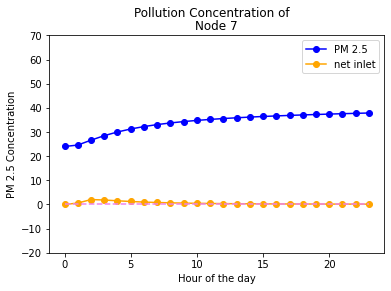

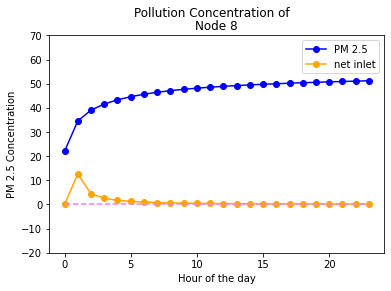

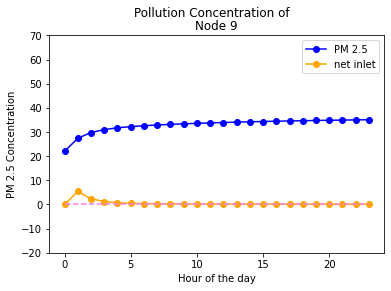

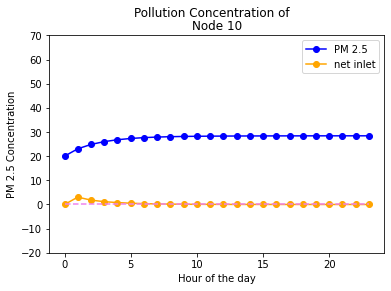

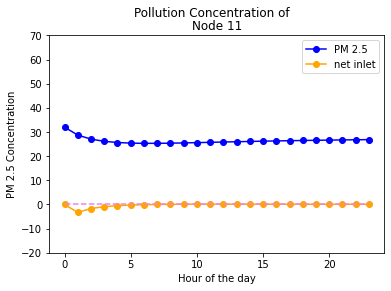

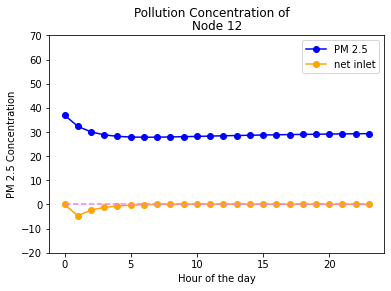

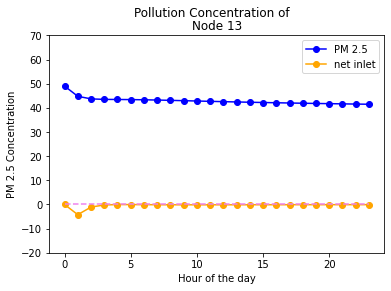

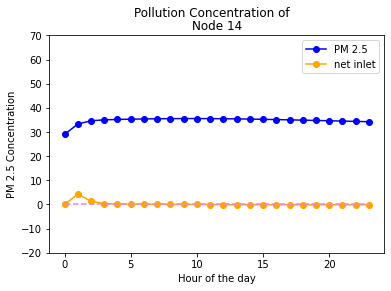

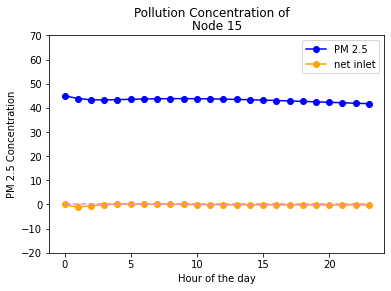

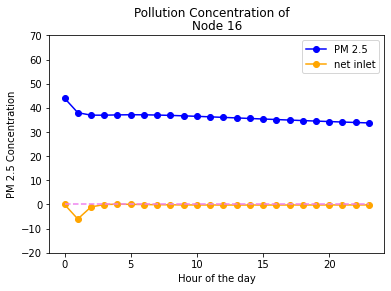

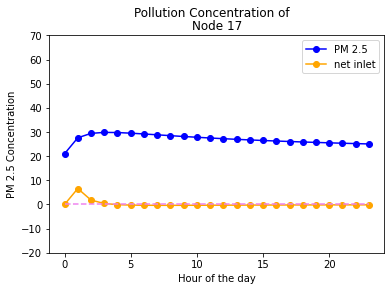

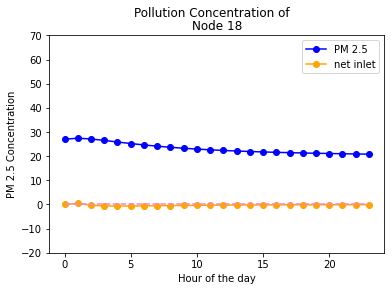

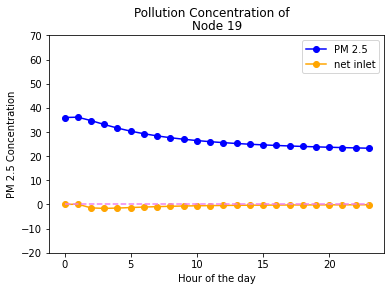

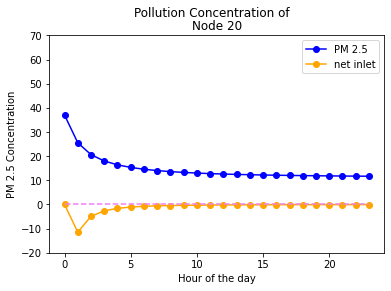

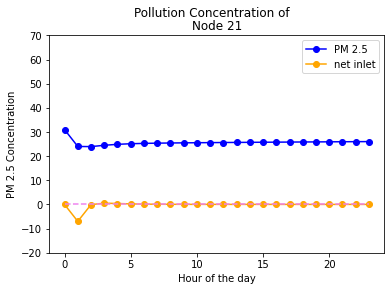

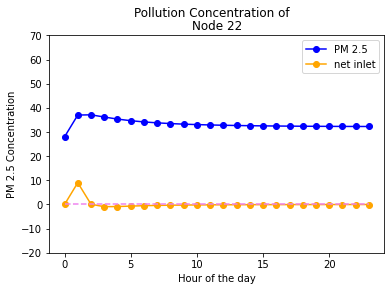

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(22):
    x=np.arange(0,no_of_hours,1)
    fig,ax = plt.subplots()
    fig.suptitle('Pollution Concentration of')
    ax_1=ax
    ax_1.plot(x,np.array(pol_node[i]),'o-',color='blue',label='PM 2.5')
    ax_1.plot(x,net_inlet[i],'o-',color='orange',label='net inlet')
    ax_1.plot([0,23],[0,0],ls='--',color='violet')
    ax_1.legend()
    ax_1.set_title(f'Node {i+1}')
    ax_1.set_yticks([-20,-10,0,10,20,30,40,50,60,70])
    ax_1.set_xlabel('Hour of the day')
    ax_1.set_ylabel('PM 2.5 Concentration')
    plt.show()

**DESCRIPTION**:
 - BP term is shut to 0
 - Value of k is variable
 - Visualizing how dispersion of initial pollution concentration occurs
 
**RESULTS**:
 - Larger the value of k, faster is the stabilisation of pollution concentration
     - For k=0.5 it happens within 5 hrs
     - For k=0.1 it takes around 10 hrs
     - For k=0.01 change no. of hours to 60 and see visulisation
 - More amount of convective transfer occurs at junction of nodes, as expected
     - Notice node 8 and 13
 - One more reason for this variation in 8 and 13 could be the initial pollution concentration at node 8 and 13 being lesser than its adjacent nodes. (seed=3)
 - For seed=4 the variation in pollution concentration of node 13 is same as any other node as its initial concentration is high
 - For seed=5 even though the initial concentration of node 8 is higher, it is still increasing because the initial concentration of adjacent nodes are relatively higher.
 - So inc. or dec. in conc. of a node solely depends on relative conc. of adjacent nodes
     - In the junctions high variations are not always expected
